In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from openbb import obb
import seaborn as sns
obb.user.preferences.output_type = "dataframe"

In [15]:
data_spy = obb.equity.price.historical(["SPY"],start_date="2020-01-01",provider="yfinance")

In [16]:
data_aapl = obb.equity.price.historical(["AAPL"],start_date="2020-01-01",provider="yfinance")

In [19]:
data_spy.close

date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2024-08-30    563.679993
2024-09-03    552.080017
2024-09-04    550.950012
2024-09-05    549.609985
2024-09-06    540.359985
Name: close, Length: 1178, dtype: float64

In [20]:
data_aapl.close

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-08-30    229.000000
2024-09-03    222.770004
2024-09-04    220.850006
2024-09-05    222.380005
2024-09-06    220.820007
Name: close, Length: 1178, dtype: float64

In [29]:
data = pd.concat([data_spy.close, data_aapl.close], axis=1)

In [30]:
data

,close,close
date,,
2020-01-02,324.869995,75.087502
2020-01-03,322.410004,74.357498
2020-01-06,323.640015,74.949997
2020-01-07,322.730011,74.597504
2020-01-08,324.450012,75.797501
...,...,...
2024-08-30,563.679993,229.000000
2024-09-03,552.080017,222.770004
2024-09-04,550.950012,220.850006


In [24]:
data.columns = ["SPY", "AAPL"]

In [25]:
returns = (
    data
    .pct_change(fill_method=None)
    .dropna()
)

In [26]:
returns = returns.reset_index()
melted = pd.melt(
    returns,
    id_vars=["date"],
    value_vars=["AAPL"],
    var_name="stock",
    value_name="returns",
)

In [34]:
melted

,date,stock,returns
0,2020-01-03,AAPL,-0.009722
1,2020-01-06,AAPL,0.007968
2,2020-01-07,AAPL,-0.004703
3,2020-01-08,AAPL,0.016086
4,2020-01-09,AAPL,0.021241
...,...,...,...
1172,2024-08-30,AAPL,-0.003438
1173,2024-09-03,AAPL,-0.027205
1174,2024-09-04,AAPL,-0.008619
1175,2024-09-05,AAPL,0.006928


In [35]:
melted["date"] = pd.to_datetime(melted["date"])

In [36]:
melted["month"] = melted["date"].dt.to_period("M")

/var/folders/l8/wvmkld_n55xc9w_c94f4zj8c0000gn/T/ipykernel_57704/3353799763.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(


[Text(0, 0, '2020-01'),
 Text(1, 0, '2020-02'),
 Text(2, 0, '2020-03'),
 Text(3, 0, '2020-04'),
 Text(4, 0, '2020-05'),
 Text(5, 0, '2020-06'),
 Text(6, 0, '2020-07'),
 Text(7, 0, '2020-08'),
 Text(8, 0, '2020-09'),
 Text(9, 0, '2020-10'),
 Text(10, 0, '2020-11'),
 Text(11, 0, '2020-12'),
 Text(12, 0, '2021-01'),
 Text(13, 0, '2021-02'),
 Text(14, 0, '2021-03'),
 Text(15, 0, '2021-04'),
 Text(16, 0, '2021-05'),
 Text(17, 0, '2021-06'),
 Text(18, 0, '2021-07'),
 Text(19, 0, '2021-08'),
 Text(20, 0, '2021-09'),
 Text(21, 0, '2021-10'),
 Text(22, 0, '2021-11'),
 Text(23, 0, '2021-12'),
 Text(24, 0, '2022-01'),
 Text(25, 0, '2022-02'),
 Text(26, 0, '2022-03'),
 Text(27, 0, '2022-04'),
 Text(28, 0, '2022-05'),
 Text(29, 0, '2022-06'),
 Text(30, 0, '2022-07'),
 Text(31, 0, '2022-08'),
 Text(32, 0, '2022-09'),
 Text(33, 0, '2022-10'),
 Text(34, 0, '2022-11'),
 Text(35, 0, '2022-12'),
 Text(36, 0, '2023-01'),
 Text(37, 0, '2023-02'),
 Text(38, 0, '2023-03'),
 Text(39, 0, '2023-04'),
 Text(40, 

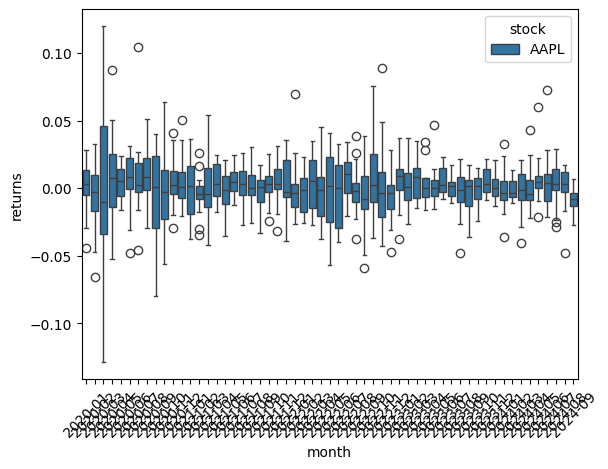

In [40]:
g = sns.boxplot(
    x="month",
    y="returns",
    hue="stock",
    data=melted
)
g.set_xticklabels(
    melted["month"].unique(),
    rotation=45
)

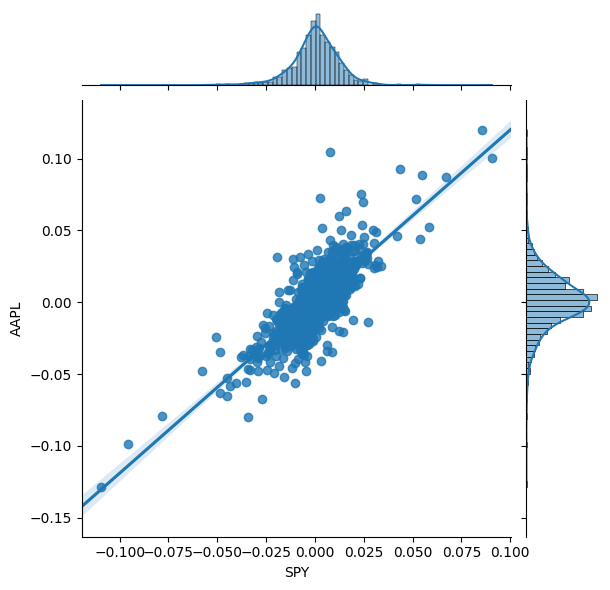

In [41]:
g = sns.jointplot(
    x="SPY",
    y="AAPL",
    data=returns,
    kind="reg",
    truncate=False,
)

In [42]:
dji = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]

In [46]:
dji

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,NaN,5.45%
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.59%
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.81%
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.02%


In [59]:
symbols = ["AAPL", "MSFT", "GOOGL"]  # List of symbols

In [70]:
dji_data = (obb.equity.price.historical( symbol=dji.Symbol , start_date="2020-01-01", provider="cboe")).pivot(columns="symbol", values="close")
dji_returns = dji_data.pct_change(fill_method=None).dropna()

In [68]:
dji_data

symbol,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.09,240.10,94.90,125.85,333.32,150.53,166.99,48.42,121.43,148.20,...,162.61,92.04,160.62,102.20,123.41,137.51,292.50,191.12,61.05,39.65
2020-01-03,74.36,238.47,93.75,124.60,332.76,148.44,166.17,47.63,121.01,146.50,...,161.06,91.25,158.62,101.92,122.58,137.02,289.54,189.60,60.40,39.30
2020-01-06,74.95,240.30,95.14,124.06,333.74,148.34,173.45,47.80,120.60,145.65,...,161.23,91.64,159.03,101.83,122.75,137.17,291.55,189.19,60.27,39.22
2020-01-07,74.60,238.04,95.34,123.41,337.28,146.38,176.00,47.49,119.06,145.70,...,160.51,89.20,157.58,101.78,121.99,135.16,289.79,188.69,59.60,38.85
2020-01-08,75.80,238.22,94.60,125.54,331.37,147.68,177.33,47.52,117.70,145.40,...,163.24,88.60,160.09,101.55,122.51,136.61,295.90,191.92,59.71,38.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,229.00,333.83,178.50,258.65,173.74,356.10,252.90,50.54,147.95,90.38,...,134.69,118.45,417.14,83.32,171.54,228.07,590.20,276.37,41.78,77.23
2024-09-02,229.00,333.83,178.50,258.65,173.74,356.10,252.90,50.54,147.95,90.38,...,134.69,118.45,417.14,83.32,171.54,228.07,590.20,276.37,41.78,77.23
2024-09-03,222.77,330.51,176.25,254.31,161.02,340.24,248.06,50.06,144.66,89.13,...,130.85,116.58,409.44,81.32,174.52,227.87,598.68,278.54,42.93,77.17


In [53]:
help(obb.equity.price.historical)

Help on method historical in module openbb.package.equity_price:

historical(symbol: Annotated[Union[str, List[str]], OpenBBField(description='Symbol to get data for. Multiple comma separated items allowed for provider(s): alpha_vantage, cboe, fmp, polygon, tiingo, tmx, tradier, yfinance.')], start_date: Annotated[Union[datetime.date, NoneType, str], OpenBBField(description='Start date of the data, in YYYY-MM-DD format.')] = None, end_date: Annotated[Union[datetime.date, NoneType, str], OpenBBField(description='End date of the data, in YYYY-MM-DD format.')] = None, chart: typing.Annotated[bool, OpenBBField(description='Whether to create a chart or not, by default False.')] = False, provider: Annotated[Optional[Literal['alpha_vantage', 'cboe', 'fmp', 'intrinio', 'polygon', 'tiingo', 'tmx', 'tradier', 'yfinance']], OpenBBField(description='The provider to use, by default None. If None, the priority list configured in the settings is used. Default priority: alpha_vantage, cboe, fmp, intri

In [71]:
corr = dji_returns.corr()

In [72]:
mask = np.triu(np.ones_like(corr, dtype=bool))

In [73]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<Axes: xlabel='symbol', ylabel='symbol'>

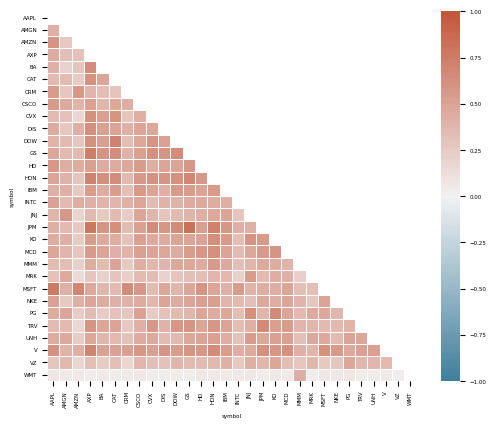

In [74]:
plt.rcParams["font.size"] = 4
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1.0,
    vmax=1.0,
    center=0,
    square=True,
    linewidths=0.5,
)